

# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

>‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
more details in [here](https://www.kaggle.com/joniarroba/noshowappointments)


### Some Questions for Analysis
> What is the percentage of patients that showed on there appointment date?

> What is the commitment of each gender on their appointment date?

> What is the commitment of each Age Group on their appointment date?

> Does receiving a message increase the percent of showing up?
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Load your data and print out a few lines.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

In [5]:
#check the data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#checking for duplicates
df.duplicated().sum()

0

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


at the beginning, there is no duplicates or null values in our data and also no possible outliers in it


### Data Cleaning



In [8]:
df.query('Age == -1').index

Int64Index([99832], dtype='int64')

In [9]:
#first we drop the unwanted columns

df.drop(['AppointmentID'], axis=1, inplace=True)
df.drop(index=99832, axis=0, inplace=True)

In [10]:
#rename our columns

df.rename(columns = lambda x: x.strip().lower().replace('-','_'), inplace=True)
df.rename(columns = {'scheduledday':'scheduled_day'},inplace =True)
df.rename(columns = {'appointmentday':'appointment_day'},inplace =True)
df.rename(columns = {'patientid':'patient_id'},inplace =True)

In [11]:
#change the data type of scheduled_day & appointment_day columns to datetime

df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [12]:
#setting the values of sms_received columns to new more readable values 

df.sms_received = df.sms_received.replace([0,1], ['Not received','Received'])

In [13]:
def set_age_group(x):
    if x < 20:
        return 'Young'
    elif x >= 20 and x < 40:
        return 'Adult'
    elif x >= 40 and x <= 70:
        return 'Old'
    else:
        return 'Senior'

In [14]:
df['age_group'] = df['age'].apply(set_age_group)

- Make a new column named **age_group** that assign each age to its current group where the groups are
    - Young: age < 20
    - Adult: 20 >= age < 40
    - Old: 40 >= age < 70
    - Senior: age > 70

In [15]:
#changing the values of no_show to another column with numeric values  

df['attend'] = df['no_show'].replace(to_replace = ['Yes','No'],value = ['0','1'])
df['attend'] = df['attend'].astype(int)

In [16]:
#checking the column values

df.attend.unique()

array([1, 0])

In [17]:
df.head(2)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group,attend
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,Not received,No,Old,1
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,Not received,No,Old,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_id       110526 non-null  float64       
 1   gender           110526 non-null  object        
 2   scheduled_day    110526 non-null  datetime64[ns]
 3   appointment_day  110526 non-null  datetime64[ns]
 4   age              110526 non-null  int64         
 5   neighbourhood    110526 non-null  object        
 6   scholarship      110526 non-null  int64         
 7   hipertension     110526 non-null  int64         
 8   diabetes         110526 non-null  int64         
 9   alcoholism       110526 non-null  int64         
 10  handcap          110526 non-null  int64         
 11  sms_received     110526 non-null  object        
 12  no_show          110526 non-null  object        
 13  age_group        110526 non-null  object        
 14  attend           110

Now our data is clean, lets start our analysis on it

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the percentage of patients that showed on there appointment date?

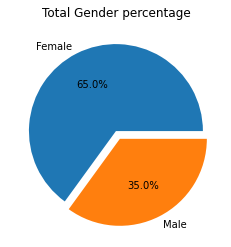

In [19]:
gender = df['gender'].value_counts()
gender.plot.pie(title ='Total Gender percentage', ylabel='', autopct='%1.1f%%', labels=['Female','Male'], explode=(0, 0.1));

Our data contains **65% Female** and **35% Men**

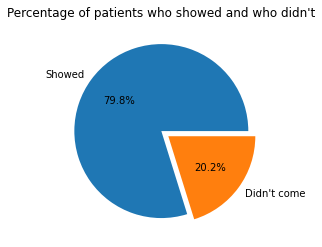

In [20]:
attended = df.groupby(["no_show"]).gender.count()
attended.plot(kind="pie", title='', labels=['Showed','Didn\'t come'], ylabel='', explode=(0, 0.1), autopct='%1.1f%%')
plt.title("Percentage of patients who showed and who didn't");

The patients who showed are **79.8%** and who doesn't show are **20.2%**

### Research Question 2: What is the commitment of each gender on their appointment date?

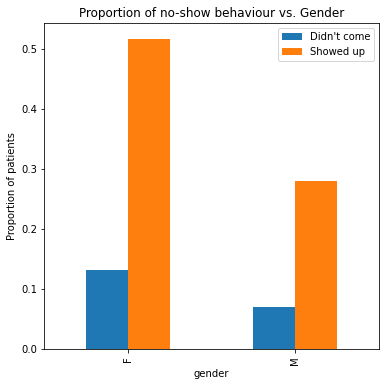

In [21]:
#proportion of each gender on showing up on their dates
total = 110527
gender_showed = df.groupby(["gender","attend"]).patient_id.count()/total
gender_showed.unstack().plot(kind="bar" , figsize=(6,6)) #plot for the grouped dataframe
plt.title("Proportion of no-show behaviour vs. Gender") #change title for the plot
plt.legend(["Didn't come", "Showed up"]); #change legend for each color of data
plt.ylabel("Proportion of patients");

Female are more interested with the health and making appoinments

In [22]:
#percentage of each gender to show on the appointment
pd.crosstab(df['gender'], df.attend).apply(lambda x: x/x.sum(), axis=1)[1]*100

gender
F    79.685129
M    80.032052
Name: 1, dtype: float64

The percentage of **Female** to show up is **79.68%**, while **male** is **80.03%** , the percentage of them is almost the same.

Then both of them have the same commitment on their appointments

### Research Question 3: What is the commitment of each Age Group on their appointment date?

<AxesSubplot:title={'center':'percentage of each age group in the data'}>

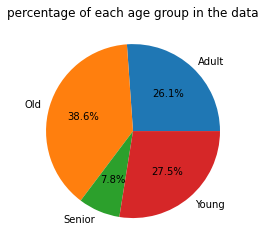

In [23]:
filtered = df.groupby(['age_group'])['patient_id'].count()
filtered.plot(kind = 'pie', title= 'percentage of each age group in the data', ylabel='', autopct='%1.1f%%')

We found out most of our data are **Old Patients** which their age is in range from 40 to 70 with **38.6%**

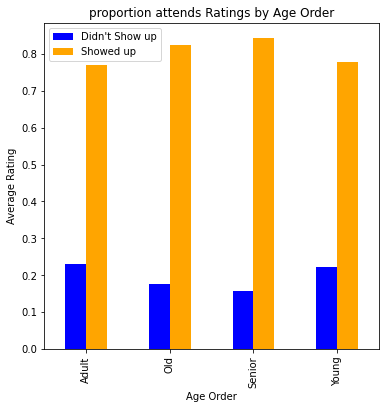

In [24]:
ctab = pd.crosstab(df['age_group'], df.attend).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='bar', color=['blue','orange'], stacked=False, figsize=(6,6), legend=True)
plt.title('proportion attends Ratings by Age Order')
plt.xlabel('Age Order')
plt.ylabel('Average Rating');
plt.legend(["Didn't Show up","Showed up"]);

We found out that the **Senior Patients** which is above the age of 70 are the most people who have the commitment their appointment date.

### Research Question 4: Is the chance to have a certain disease incerase by age?

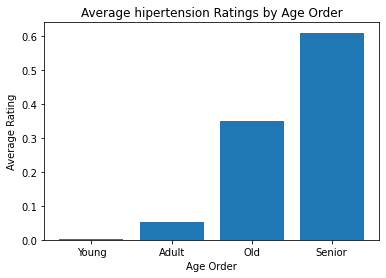

In [25]:
filtered = df.groupby(['age_group'])['hipertension'].mean()
locations = [2,3,4,1]
heights = filtered
labels = filtered.index.str.title()
plt.bar(locations, heights, tick_label=labels)
plt.title('Average hipertension Ratings by Age Order')
plt.xlabel('Age Order')
plt.ylabel('Average Rating');


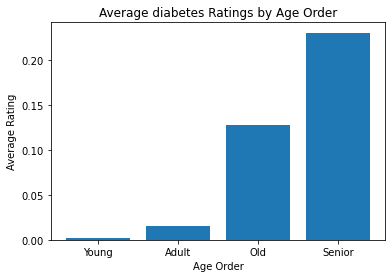

In [26]:
filtered = df.groupby(['age_group'])['diabetes'].mean()
locations = [2,3,4,1]
heights = filtered
labels = filtered.index.str.title()
plt.bar(locations, heights, tick_label=labels)
plt.title('Average diabetes Ratings by Age Order')
plt.xlabel('Age Order')
plt.ylabel('Average Rating');

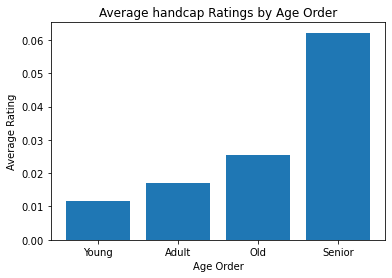

In [27]:
filtered = df.groupby(['age_group'])['handcap'].mean()
locations = [2,3,4,1]
heights = filtered
labels = filtered.index.str.title()
plt.bar(locations, heights, tick_label=labels)
plt.title('Average handcap Ratings by Age Order')
plt.xlabel('Age Order')
plt.ylabel('Average Rating');

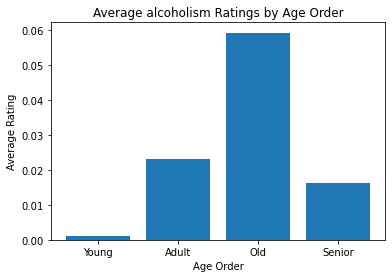

In [28]:
filtered = df.groupby(['age_group'])['alcoholism'].mean()
locations = [2,3,4,1]
heights = filtered
labels = filtered.index.str.title()
plt.bar(locations, heights, tick_label=labels)
plt.title('Average alcoholism Ratings by Age Order')
plt.xlabel('Age Order')
plt.ylabel('Average Rating');

From these graphs:

- Their is a direct relationship between getting old and have the disease where
    - Hipertension, Diabetes and Handcap are increasing as the age increase
    - but alcoholism isn't high in seniors but is direct proprotional with the other groups of ages where the old is the highest patients suffering from it

### Research Question 5: Does the patients with scholarship show up more than the others?

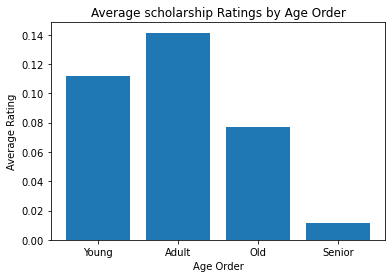

In [29]:
filtered = df.groupby(['age_group'])['scholarship'].mean()
locations = [2,3,4,1]
heights = filtered
labels = filtered.index.str.title()
plt.bar(locations, heights, tick_label=labels)
plt.title('Average scholarship Ratings by Age Order')
plt.xlabel('Age Order')
plt.ylabel('Average Rating');

The **adult Patients**  which the age is in range from 20 to 40 are patient who have scholarship the most.

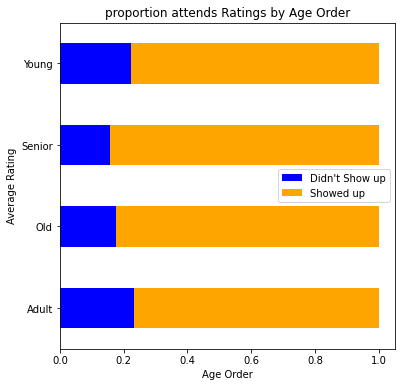

In [30]:
ctab = pd.crosstab(df['age_group'], df.attend).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='barh', color=['blue','orange'], stacked=True, figsize=(6,6), legend=True)
plt.title('proportion attends Ratings by Age Order')
plt.xlabel('Age Order')
plt.ylabel('Average Rating');
plt.legend(["Didn't Show up","Showed up"]);

The **Senior group** which the age is above 70 are the most people who have the commitment their appointment date.

therefore, scholarship doesn't affect on showing up.

### Research Question 6: Does receiving  a message increase the percent of showing up?

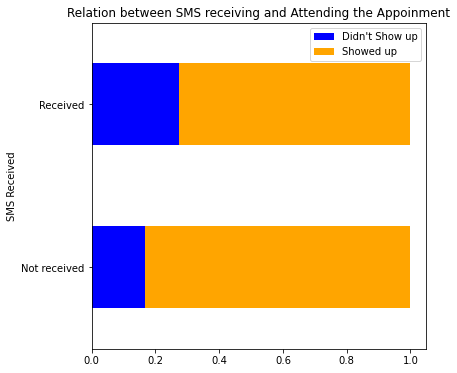

In [31]:
ctab = pd.crosstab(df['sms_received'], df.attend).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='barh', color=['blue','orange'], stacked=True, figsize=(6,6), legend=True)
plt.title('Relation between SMS receiving and Attending the Appoinment')
plt.ylabel('SMS Received')
plt.legend(["Didn't Show up","Showed up"]);

In [32]:
pd.crosstab(df['sms_received'], df.attend).apply(lambda x: x/x.sum(), axis=1)[1]

sms_received
Not received    0.832965
Received        0.724255
Name: 1, dtype: float64

The people that didn't receive a message has attended more than the people who received it
- so receiving a SMS message won't increase the chance of showing up

### Research Question 7: what is the percentage of each age group in message receiving?

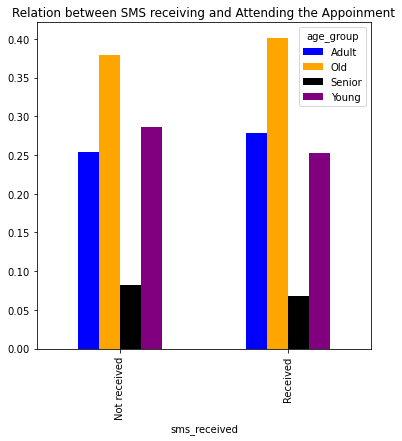

In [33]:
ctab = pd.crosstab(df['sms_received'], df.age_group).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='bar', color=['blue','orange','black','purple'], stacked=False, figsize=(6,6), legend=True)
plt.title('Relation between SMS receiving and Attending the Appoinment');

We found out that the percentage of sms sent increases as the age increases but not for seniors.

### Research Question 8: In what neighbourhood does the appointments take place? and what is the percent of showing up in there?

In [34]:
df.describe(include='all')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group,attend
count,1.105260e+05,110526,110526,110526,110526.000000,110526,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526,110526,110526,110526.000000
unique,NaN,2,111,27,NaN,81,NaN,NaN,NaN,NaN,NaN,2,2,4,NaN
top,NaN,F,2016-05-03 00:00:00,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,Not received,No,Old,NaN
freq,NaN,71839,4238,4691,NaN,7717,NaN,NaN,NaN,NaN,NaN,75044,88207,42672,NaN
first,NaN,NaN,2015-11-10 00:00:00,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-06-08 00:00:00,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.474934e+14,NaN,NaN,NaN,37.089219,NaN,0.098266,0.197248,0.071865,0.030400,0.022248,NaN,NaN,NaN,0.798066
std,2.560943e+14,NaN,NaN,NaN,23.110026,NaN,0.297676,0.397923,0.258266,0.171686,0.161543,NaN,NaN,NaN,0.401445
min,3.921784e+04,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,4.172536e+12,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000


**JARDIM CAMBURI** is the neighbourhood that most appointments takes place in it with 7717 appointments

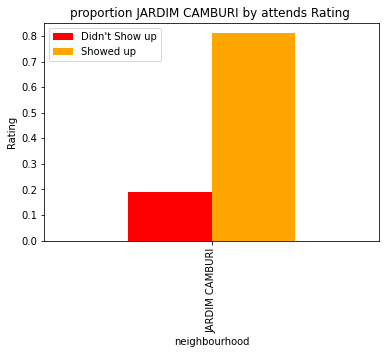

In [35]:
df_hood = df[df['neighbourhood'] == "JARDIM CAMBURI"]
ctab = pd.crosstab(df_hood['neighbourhood'], df_hood.attend).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='bar', color=['red','orange'], stacked=False)
plt.title('proportion JARDIM CAMBURI by attends Rating ')
plt.ylabel('Rating')
plt.legend(["Didn't Show up","Showed up"]);

More than **80%** of the people in **JARDIM CAMBURI** showed up in their appointments

In [36]:
pd.crosstab(df_hood['gender'], df_hood.attend).apply(lambda x: x/x.sum(), axis=1)[1]*100

gender
F    80.618196
M    81.811115
Name: 1, dtype: float64

Percentage of **Female patient** to show up in **JARDIM CAMBURI** neighbourhood is **80.61%** , while **Men patient** percentage is **81.81%** which is nearly the same percentage.

In [37]:
pd.crosstab(df_hood['age_group'], df_hood.attend).apply(lambda x: x/x.sum(), axis=1)[1]*100


age_group
Adult     79.427430
Old       82.823763
Senior    82.369146
Young     77.012278
Name: 1, dtype: float64

The **hightest percentage** for an age group of showing up in **JARDIM CAMBURI** neighbourhood is **82.82% by the Old Patients** , while the **lowest percentage** is **77.01% by the Young Patients**

### Research Question 9: Does neighbourhood affects on showing up the patients?

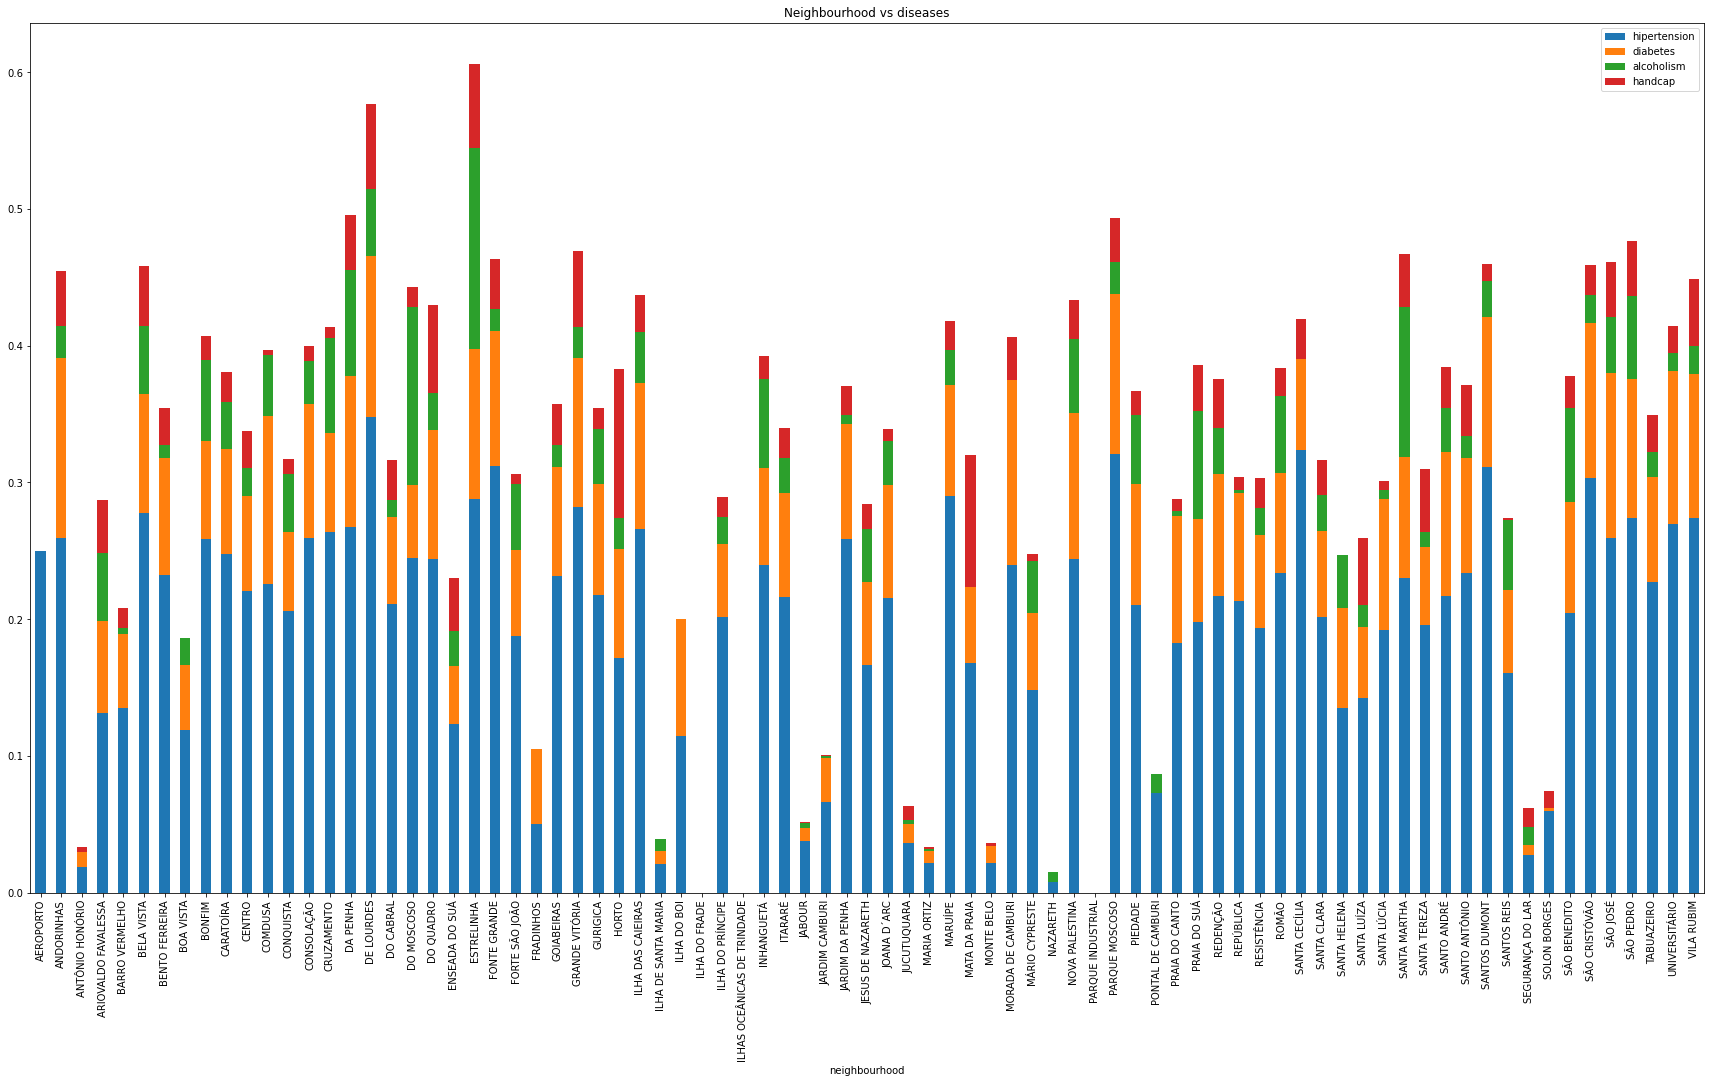

In [38]:
filtered = df.groupby("neighbourhood")['hipertension','diabetes','alcoholism','handcap']
filtered.mean().plot(kind="bar", stacked=True, figsize=(30,16))
plt.title('Neighbourhood vs diseases');

The patients in most of the neighbourhoods suffers from **hipertension** the most

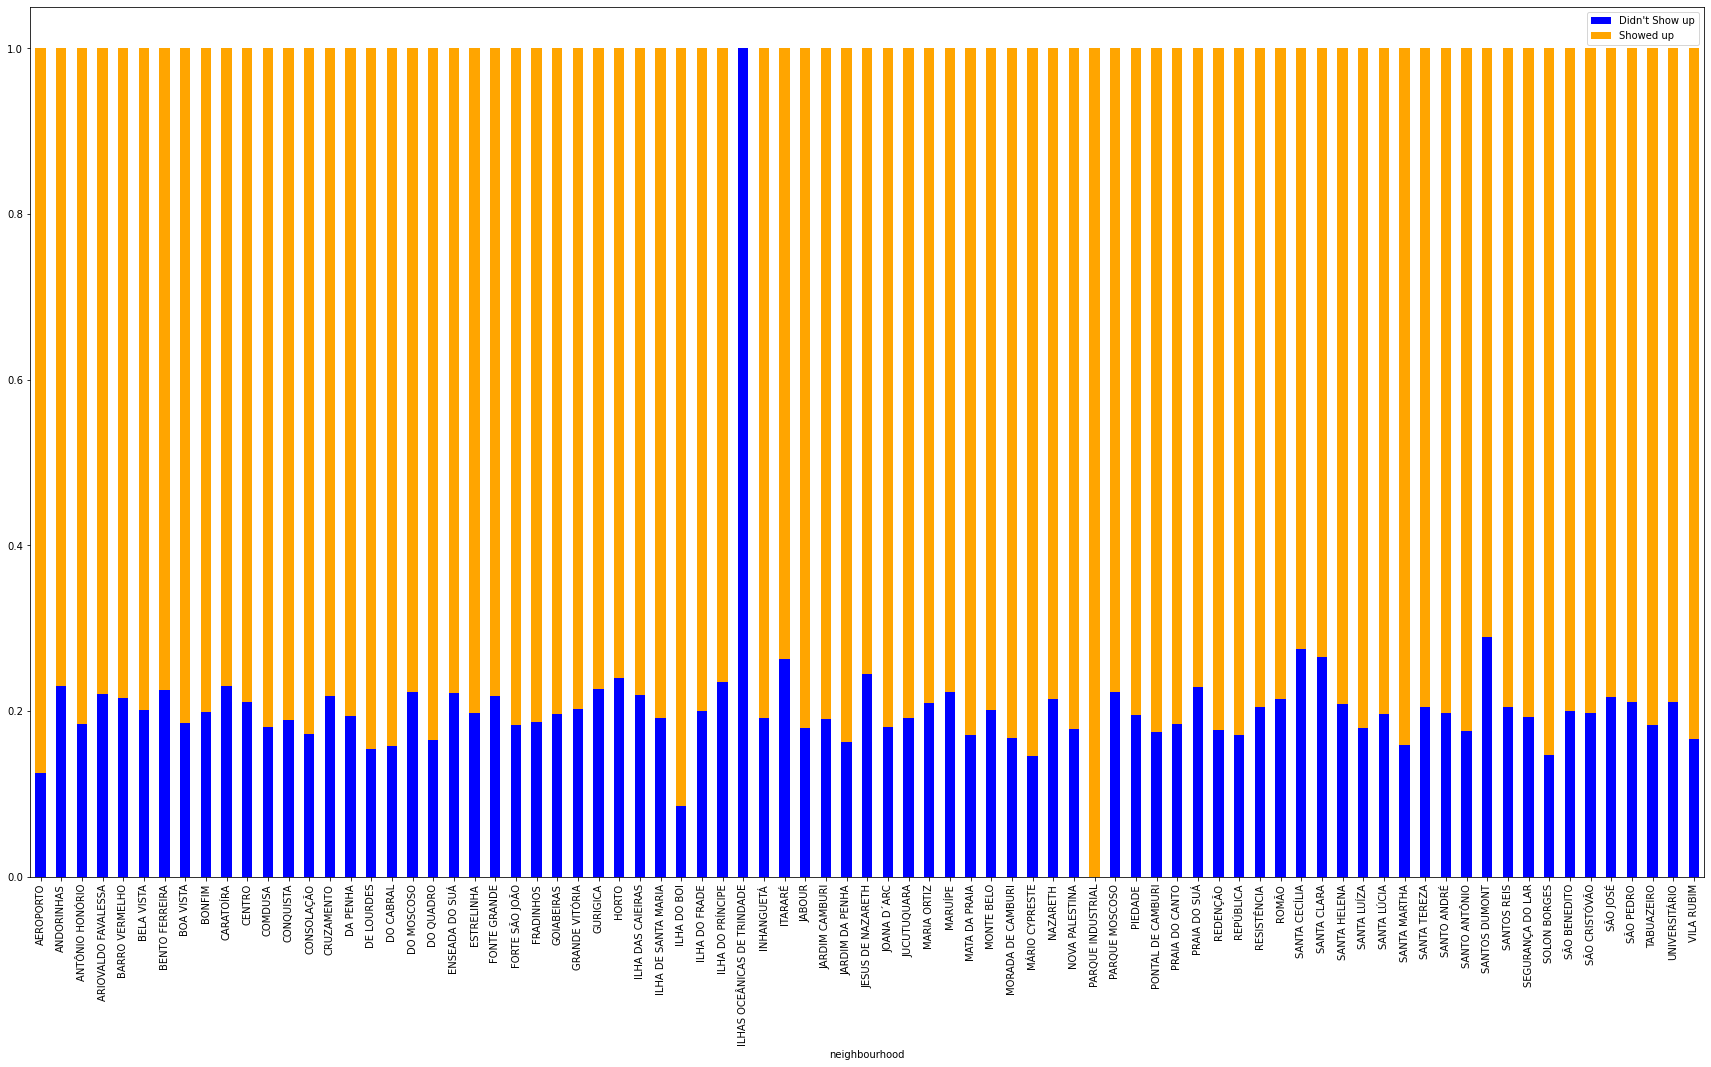

In [39]:
#stacked_bar('neighbourhood')
ctab = pd.crosstab(df['neighbourhood'], df.attend).dropna().apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='bar', color=['blue','orange'], stacked=True, figsize = (30,16))
plt.legend(["Didn't Show up","Showed up"]);

Here most of the neighbourhood actually showed but there are two neighbourhoods are interesting 

If the patient from **Ilhas Oceanias De Trindade** has a large chance (more than 98%) to not show on the appointment, and if the patient from **Parque Industrial** has a large chance (more than 98%) to show on the appointment

### Research Question 9: Does the duration between scheduling and appointment dates affect on the ability of the patient to show up?

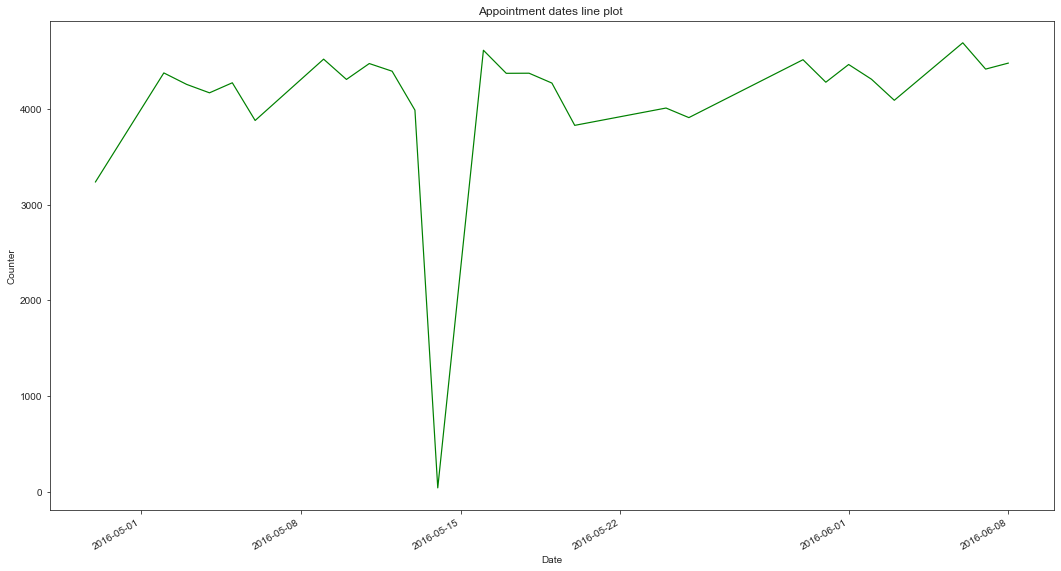

In [40]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
df.appointment_day.value_counts().plot(kind='line', linewidth=1.2, color='green')
plt.ylabel('Counter')
plt.xlabel('Date')
plt.title('Appointment dates line plot ');

all of the appointments are in year **2016**

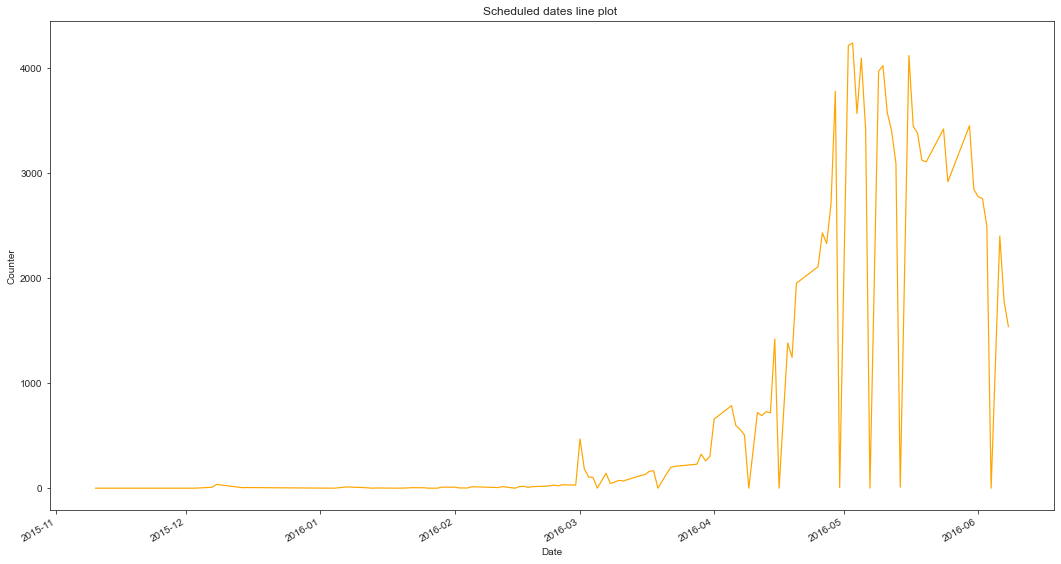

In [41]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
df.scheduled_day.value_counts().plot(kind='line', linewidth=1.2, color='orange')
plt.ylabel('Counter')
plt.xlabel('Date')
plt.title('Scheduled dates line plot ');

no so many scheduled dates at the begining but increses with the appointment dates

In [42]:
#Make a new column named duration which gets the difference between the appointment day and scheduled day

df["duration"] = (df["appointment_day"].dt.date) - (df["scheduled_day"].dt.date)
df["duration"] = df["duration"].dt.days
df.groupby("attend").mean()["duration"]

attend
0    15.831489
1     8.754759
Name: duration, dtype: float64

- Average of **15 days** between the scheduling  day and the appointments day for Patients who didn't come.
- Average of **8 days** between their scheduling  day and their appointment day for Patients who showed up.

    therfore,
- As Duration increases, the ability of patients to show up on their appointments decreases.

<a id='conclusions'></a>
## Conclusions

- Summary:
    - Our data contains 65% Female and 35% Men
    - The patients percentage who showed are 79.8% and who doesn't show are 20.2%
    - Gender doesn't change in patient commitment on their appointments
    - Hipertension, Diabetes and Handcap are increasing as the age increase
    - Most of our data are Old Patients with 38.6%
    - Patients who have many scholarships are the Adult patients 
    - Scholarship doesn't affect on showing up
    - The most people who have the commitment their appointment date are Senior patients.
    - Receiving a SMS message won't increase the chance of showing up
    - Percentage of sms sent to be sent to patients increases as the age increases but not for seniors
    - Most appointments takes place in JARDIM CAMBURI neighbourhood with 7717 appointments
    - More than 80% of the people in JARDIM CAMBURI showed up in their appointments
    - Gender doesn't change in patient commitment on their appointments in JARDIM CAMBURI neighbourhood 
    - 82.82% by the Old Patients shows up in their appointments
    - Most of patients in the neighbourhoods suffers from Hipertension the most
    - Most of the neighbourhood showed up 
    - Patient from Ilhas Oceanias De Trindade has large chance to not show on the appointment
    - Patient from Parque Industrial has large chance to show on the appointment
    - As Duration increases, the ability of patients to show up on their appointments decreases



- Limitations:
    - Dates in the data are not that accurate and no too many as it should be so the graph isn't filled with data
    - Timing the SMS messages could be useful
    - no name for the scholarship that could be useful in analysis